In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('pp_recipes.csv')
print("Dataset Shape:", df.shape)



C:\Users\luant\AppData\Local\Temp\ipykernel_11600\1562978876.py:5: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pp_recipes.csv')


Dataset Shape: (507335, 37)


In [2]:
df.shape

(507335, 37)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(5)

,vinaigrette,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,food_kg_locator,recipe_url,tags,new_recipe_id,new_author_id,average_rating,number_of_ratings,servingsPerRecipe,servingSize [g],calories [cal],caloriesFromFat [cal],totalFat [g],saturatedFat [g],cholesterol [mg],sodium [mg],totalCarbohydrate [g],dietaryFiber [g],sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
0,0,447642,Cranberry-Orange Caramel Corn,"Taken from Beter Homes and Gardens, November 2...",409184,40.0,['Preheat oven to 275 degrees. In a very large...,"{'': [('popcorn, popped', '12 time(s) cups ')...",20,2011-01-29,http://idea.rpi.edu/heals/kb/recipe/5e6ae80d-C...,https://www.food.com/recipe/cranberry-orange-c...,NaN,0,4589,0.0,0,20,30.0,97.2,57.0,6.4,3.0,12.2,73.8,9.9,0.7,6.9,0.8,9,9,0.168254,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['baking soda', 'brown sugar', 'butter', 'corn..."
1,1,53662,Cocktail De Camarones,I ordered shrimp cocktail at a Mexican restaur...,64251,20.0,"['After you chop the tomatoes, onions and cila...",{'': [('shelled and cooked shrimp (50-60 count...,2-4,2009-06-03,http://idea.rpi.edu/heals/kb/recipe/d6b47db2-C...,https://www.food.com/recipe/cocktail-de-camaro...,"['30-minutes-or-less', 'time-to-make', 'course...",1,142553,5.0,5,2,303.0,427.3,158.0,17.6,2.9,442.0,526.3,17.8,9.4,6.3,51.3,7,10,0.335455,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['avocado', 'cilantro', 'cooked shrimp', 'garl..."
2,2,520465,Inbal Jerusalem Hotel Snowball,This recipe was created in response to a Janua...,1803632771,210.0,"['Combine gelatin with cold water', 'Combine c...","{'': [('cream', '200 time(s) g '), ('vanilla ...",5,2015-01-08,http://idea.rpi.edu/heals/kb/recipe/29080638-I...,https://www.food.com/recipe/inbal-jerusalem-ho...,NaN,2,276377,0.0,0,5,759.0,1273.2,610.0,67.8,40.3,307.5,475.7,85.3,0.3,78.0,87.7,12,17,0.128082,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['cold water', 'condensed milk', 'cornflour', ..."
3,3,213601,Santorini Roasted Leg of Lamb,A succulent slow-roasted leg of lamb with herb...,183057,375.0,['Trim excess fat and silver skin from lamb le...,"{'': [('of lamb', '6 time(s) lbs leg '), ('dr...",10-12,2009-05-17,http://idea.rpi.edu/heals/kb/recipe/6af68948-S...,https://www.food.com/recipe/santorini-roasted-...,"['course', 'main-ingredient', 'cuisine', 'occa...",3,5016,4.5,2,10,251.0,581.9,333.0,37.1,15.9,182.3,159.1,7.6,2.0,3.6,51.1,8,8,0.320622,0.375,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['dried mint flakes', 'dried oregano', 'dried ..."
4,4,67731,Cantonese Chicken Burgers,Adapted from a recipe in BHG's grilling magazine.,37779,38.0,"['In a mixing bowl, add the egg, sesame oil, a...","{'': [('egg, beaten', '1 time(s) '), ('toaste...",4,2007-11-21,http://idea.rpi.edu/heals/kb/recipe/83f130d0-C...,https://www.food.com/recipe/cantonese-chicken-...,NaN,4,105,0.0,0,4,242.0,443.8,167.0,18.6,4.4,144.0,649.2,39.6,3.0,4.2,30.3,6,12,0.254427,0.500,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['carrots', 'egg', 'fine dry breadcrumbs', 'ga..."


In [4]:
df.columns

Index(['vinaigrette', 'recipe_id', 'title', 'description', 'author_id',
       'duration', 'directions', 'ingredients', 'serves', 'last_changed_date',
       'food_kg_locator', 'recipe_url', 'tags', 'new_recipe_id',
       'new_author_id', 'average_rating', 'number_of_ratings',
       'servingsPerRecipe', 'servingSize [g]', 'calories [cal]',
       'caloriesFromFat [cal]', 'totalFat [g]', 'saturatedFat [g]',
       'cholesterol [mg]', 'sodium [mg]', 'totalCarbohydrate [g]',
       'dietaryFiber [g]', 'sugars [g]', 'protein [g]', 'direction_size',
       'ingredients_sizes', 'who_score', 'fsa_score', 'nutri_score',
       'normalization_comment', 'ingredient_food_kg_urls',
       'ingredient_food_kg_names'],
      dtype='object')

In [5]:
## 1

print("NUTRITIONAL DISTRIBUTIONS")
nutritional_cols = ['calories [cal]', 'protein [g]', 'sodium [mg]']
for col in nutritional_cols:
    if col in df.columns:
        stats = df[col].describe()
        print(f"{col}: Mean={stats['mean']:.1f}, Median={stats['50%']:.1f}, Std={stats['std']:.1f}")

print("\nDURATION ANALYSIS")
duration_clean = df['duration'].dropna()
quick_recipes = (duration_clean < 20).sum()
long_recipes = (duration_clean > 60).sum()
total_duration = len(duration_clean)

print(f"Quick recipes (<20 min): {quick_recipes} ({quick_recipes/total_duration*100:.1f}%)")
print(f"Long recipes (>60 min): {long_recipes} ({long_recipes/total_duration*100:.1f}%)")
print(f"Duration - Mean: {duration_clean.mean():.1f} min, Median: {duration_clean.median():.1f} min")

NUTRITIONAL DISTRIBUTIONS
calories [cal]: Mean=482.9, Median=316.5, Std=1406.9
protein [g]: Mean=17.4, Median=9.1, Std=39.8
sodium [mg]: Mean=761.3, Median=352.2, Std=4076.2

DURATION ANALYSIS
Quick recipes (<20 min): 97682 (19.5%)
Long recipes (>60 min): 135780 (27.2%)
Duration - Mean: 64.8 min, Median: 40.0 min


In [6]:
print("TOP 5 TAGS:")
all_tags = []

for tag_string in df["tags"].dropna():
    if str(tag_string).startswith("["):
        tags = str(tag_string).strip("[]").replace("'", "").split(", ")
        all_tags.extend(tags)

tag_counts = {}
for tag in all_tags:
    tag_counts[tag] = tag_counts.get(tag, 0) + 1

sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)
for i, (tag, count) in enumerate(sorted_tags[:5]):
    print(f"{i+1}. {tag}: {count} recipes")

print(f"\nTotal unique tags: {len(tag_counts)}")

TOP 5 TAGS:
1. preparation: 229584 recipes
2. time-to-make: 224383 recipes
3. course: 217315 recipes
4. main-ingredient: 170001 recipes
5. dietary: 164578 recipes

Total unique tags: 552


In [7]:
df["serves"].unique()

array(['20', '2-4', '5', '10-12', '4', '8', '12', '1-20', '2', '4-6', '6',
       '18', '6-8', nan, '1', '8-10', '10', '30', '15', '24', '6-10',
       '15-20', '16', '12-15', '1-2', '40', '4-5', '3-4', '8-12', '7',
       '16-18', '12-16', '2-3', '9', '18-20', '3', '20-24', '64', '38',
       '5-6', '16-20', '32', '4-10', '5-7', '14', '5-10', '10-20', '3-5',
       '100', '3-6', '48', '15-18', '9-16', '34', '1-100', '12-14',
       '15-17', '12-18', '4-8', '25', '6-12', '36', '20-30', '4-12', '92',
       '1210', '1-3', '70', '72', '43', '54', '14-16', '26', '102', '60',
       '27', '1-4', '7-9', '20-25', '84', '45', '13', '16-24', '50', '17',
       '6-9', '8-9', '28', '160', '6-7', '200', '12-24', '12-36', '75',
       '46', '42-48', '49', '24-30', '25-30', '19', '2-6', '15-25',
       '48-60', '120', '22', '192', '60-70', '10-15', '36-48', '9-18',
       '15-24', '400', '25-50', '5-8', '406', '30-32', '40-50', '16-32',
       '81', '7-8', '9-12', '8-16', '11', '10-14', '42', '112'

In [8]:
#examples of problematic rows
df.sort_values("calories [cal]", ascending=False).head()

,vinaigrette,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,food_kg_locator,recipe_url,tags,new_recipe_id,new_author_id,average_rating,number_of_ratings,servingsPerRecipe,servingSize [g],calories [cal],caloriesFromFat [cal],totalFat [g],saturatedFat [g],cholesterol [mg],sodium [mg],totalCarbohydrate [g],dietaryFiber [g],sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
2740,2740,264817,How to Make Corned Beef,"An heirloom, butchering-time recipe impractica...",64642,NaN,"['Scrub a good oak barrel thoroughly.', 'Put a...","{'': [('beef (this amount is approximate)', '2...",NaN,2007-11-11,http://idea.rpi.edu/heals/kb/recipe/1a2711b5-H...,https://www.food.com/recipe/how-to-make-corned...,NaN,2740,43,0.00,0,1,91708.0,612854.6,579313.0,64368.1,26740.6,89892.0,287613.6,222.7,0.0,220.2,7454.9,10,5,0.069714,0.00,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['butter', 'nuts', 'oatmeal', 'sweetened conde..."
439928,439928,193435,Tennessee Moonshine,common moonshine recipe in Tennessee,374913,20.0,['To boiled cornmeal add yeast and lots of sug...,"{'': [('cornmeal', '50 time(s) lbs '), ('natu...",1,2013-01-31,http://idea.rpi.edu/heals/kb/recipe/d9abe0ee-T...,https://www.food.com/recipe/tennessee-moonshin...,"['30-minutes-or-less', 'time-to-make', 'course...",439928,300015,0.00,3,1,876698.0,434360.2,7567.0,840.8,118.0,0.0,31777.7,108294.6,1748.6,90682.3,1980.8,3,5,0.147510,0.00,0.25,NaN,NaN,NaN
209569,209569,519856,Italian Mint Lamb,"Saucy and succulent mint Lamb, best sided with...",1803395015,80.0,"['Put The Chutney into a mixing bowl.', 'mix i...","{'': [('peach chutney', '2 time(s) cups '), (...",4-5,2014-12-04,http://idea.rpi.edu/heals/kb/recipe/dd99cd32-I...,https://www.food.com/recipe/italian-mint-lamb-...,NaN,209569,290154,5.00,1,4,90357.0,350473.1,271113.0,30123.7,13269.4,83404.5,63267.3,26.2,4.8,5.8,18396.2,19,12,0.142938,0.25,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['eggs', 'flour', 'green bell peppers', 'oil',..."
355144,355144,227470,Deep Fried Prime Rib,This makes the juicest and best flavored prime...,485396,100.0,['The night before you plan to serve your prim...,{'': [('boneless rib-eye roast or 8 -10 lbs bo...,NaN,2017-12-24,http://idea.rpi.edu/heals/kb/recipe/752de74e-D...,https://www.food.com/recipe/deep-fried-prime-r...,"['time-to-make', 'course', 'main-ingredient', ...",355144,103366,4.00,1,1,14016.0,101614.7,100524.0,11169.4,2079.0,2467.6,5523.4,4.3,2.1,0.0,636.0,9,6,0.071785,0.25,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['apple cider', 'apples', 'butter', 'chicken b..."
249210,249210,57827,Chocolate Moose,This is for VERY special occasions only - it t...,37183,NaN,"['Send spouse to Alaska to capture moose, or h...","{'': [('moose', '1 time(s) '), ('hershey choco...",NaN,2020-11-12,http://idea.rpi.edu/heals/kb/recipe/70f10f50-C...,https://www.food.com/recipe/chocolate-moose-57827,NaN,249210,800,4.34,30,1,18152.0,90904.2,85418.0,9491.0,5869.7,0.0,4354.5,5415.2,3012.0,166.0,2340.6,11,4,0.177674,0.00,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['cabbage', 'extra lean ground beef', 'long gr..."


99th percentile - Protein: 1030.4g, Calories: 18970.0

Extreme protein outliers (51 recipes):
                                title  protein [g]
2740          How to Make Corned Beef       7454.9
7895       Maple Apple Roasted Turkey       1114.6
8244               Roast Suckling Kid       1033.4
8825   Grandmag's Baked Christmas Ham       2106.8
13950           Hot Chocolate Dry Mix       1122.6

Extreme calorie outliers (51 recipes):
                                                   title  calories [cal]
2740                             How to Make Corned Beef        612854.6
8825                      Grandmag's Baked Christmas Ham         23343.1
13950                              Hot Chocolate Dry Mix         25248.7
26227                         Easy, Easy Friendship Cake         40159.2
29786  High Energy Double-Nut Tweety Treat for the Birds         26811.8


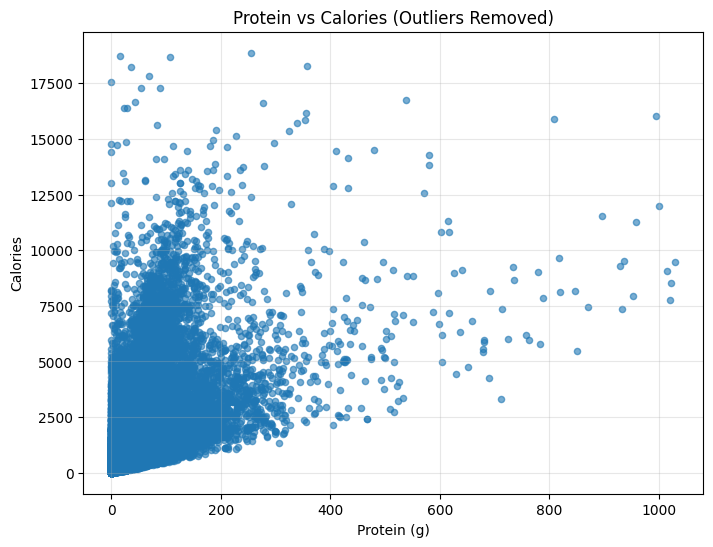

In [9]:
protein = df["protein [g]"].dropna()
calories = df["calories [cal]"].dropna()

p99_protein = protein.quantile(0.9999)
p99_calories = calories.quantile(0.9999)

print(f"99th percentile - Protein: {p99_protein:.1f}g, Calories: {p99_calories:.1f}")

extreme_protein = df[df["protein [g]"] > p99_protein]
extreme_calories = df[df["calories [cal]"] > p99_calories]

print(f"\nExtreme protein outliers ({len(extreme_protein)} recipes):")
if len(extreme_protein) > 0:
    print(extreme_protein[["title", "protein [g]"]].head())

print(f"\nExtreme calorie outliers ({len(extreme_calories)} recipes):")
if len(extreme_calories) > 0:
    print(extreme_calories[["title", "calories [cal]"]].head())

mask = (df["protein [g]"] <= p99_protein) & (df["calories [cal]"] <= p99_calories)
df = df[mask]

plt.figure(figsize=(8, 6))
plt.scatter(df["protein [g]"], df["calories [cal]"], alpha=0.6, s=20)
plt.xlabel("Protein (g)")
plt.ylabel("Calories")
plt.title("Protein vs Calories (Outliers Removed)")
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
import re
import json
from typing import Dict, List, Set, Optional, Any
from nltk.corpus import wordnet as wn
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

class RecipeConstraintParser:
    def __init__(self):
        self.nutrients = ['protein', 'calorie', 'sugar', 'sodium', 'carbohydrate', 'carb', 'fat']
        self.time_keywords = ['minute', 'time', 'duration', 'hour', 'hr', 'min', 'minutes', 'mins', 'sec', 'seconds']
        self.diet_keywords = ['vegan', 'vegetarian', 'paleo', 'keto', 'gluten-free', 'dairy-free', 'low-carb']
        self.health_keywords = ['healthy', 'light', 'low-fat']
        self.number_words = {
            'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
            'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10
        }
        
        self.max_operators = ['no more than', 'less than', 'fewer than', 'under', 'below', 'maximum', 'max']
        self.min_operators = ['no less than', 'more than', 'at least', 'over', 'above', 'minimum', 'min', 'exceeding', 'exceed']
        
        self.units = ['g', 'gram', 'mg', 'milligram', 'kcal', 'calorie']
        
        self.food_roots = {
            'food', 'foodstuff', 'nutriment', 'dish', 'ingredient', 'edible',
            'poultry', 'meat', 'beef', 'pork', 'fish', 'seafood',
            'vegetable', 'veg', 'fruit', 'grain', 'cereal',
            'spice', 'herb', 'condiment', 'sauce',
            'beverage', 'drink', 'dairy', 'cheese', 'bread'
        }
        
        self.generic_nouns = {
            'recipe', 'recipes', 'option', 'options', 'idea', 'ideas', 'meal',
            'meals', 'food', 'dinner', 'dinners', 'lunch', 'lunches', 'breakfast',
            'breakfasts', 'dessert', 'desserts', 'appetizer', 'appetizers', 'soup',
            'soups', 'salad', 'salads', 'dish', 'dishes', 'serving', 'servings', 
            'person', 'people', 'g', 'mg', 'kcal', 'time', 'constraint', 
            'preference', 'preferences', 'style', 'diet', 'diets', 'sweet', 'snack',
            'snacks', 'appetiser', 'appetisers', 'starter', 'starters'
        }
        
        self.common_stop_words = set(['show', 'find', 'give', 'need', 'want', 'something', 'recipes', 'dishes', 
                                      'meals', 'options', 'ideas', 'make', 'breakfast', 'lunch', 'dinner', 
                                      'dessert', 'snack', 'quick', 'healthy', 'high', 'low', 'people', 'no'])
    
    def _is_synset_food_related(self, synset: wn.synset) -> bool:
        """Helper to check if a WordNet synset itself or its hypernyms are food-related."""
        
        synset_name = synset.name().split('.')[0]
        if synset_name in self.food_roots:
            return True
        hypernyms = synset.hypernyms()
        for hypernym in hypernyms:
            hypernym_name = hypernym.name().split('.')[0]
            if hypernym_name in self.food_roots:
                return True
            for h2 in hypernym.hypernyms():
                h2_name = h2.name().split('.')[0]
                if h2_name in self.food_roots:
                    return True
        return False

    def is_food_related(self, word: str) -> bool:
        synsets = wn.synsets(word, pos=wn.NOUN)
        for synset in synsets[:3]:  # Check first 3 senses
            if self._is_synset_food_related(synset):
                return True
        return False
    
    def get_ingredient_synonyms(self, ingredient: str) -> Set[str]:
        synonyms = set()
        synonyms.add(ingredient.lower())
        words = ingredient.lower().split()
        
        for word in words:
            synsets = wn.synsets(word, pos=wn.NOUN)
            for synset in synsets[:3]:  # Limit to top 3 synsets
                
                if self._is_synset_food_related(synset):
                    for lemma in synset.lemmas():
                        synonym = lemma.name().lower().replace('_', ' ')
                        if len(synonym.split()) <= 3:  # Avoid long compound terms
                            synonyms.add(synonym)
        
        compound = ingredient.lower().replace(' ', '_')
        synsets = wn.synsets(compound, pos=wn.NOUN)
        for synset in synsets[:3]:
            
            if self._is_synset_food_related(synset):
                for lemma in synset.lemmas():
                    synonym = lemma.name().lower().replace('_', ' ')
                    if len(synonym.split()) <= 3:
                        synonyms.add(synonym)
        
        return synonyms
    
    def extract_number(self, text: str) -> Optional[float]:
        match = re.search(r'(\d+(?:\.\d+)?)', text)
        if match:
            return float(match.group(1))
        
        for word, num in self.number_words.items():
            if word in text.lower():
                return float(num)
        
        return None
    
    def parse_count(self, text: str) -> Optional[int]:
        patterns = [
            r'(?:find|show|give me)\s+(\w+)\s+(?:recipes|dishes|meals|options)',
            r'(\w+)\s+(?:vegan|vegetarian|keto|paleo)',
        ]
        
        for pattern in patterns:
            match = re.search(pattern, text.lower())
            if match:
                count_word = match.group(1)
                num = self.extract_number(count_word)
                if num:
                    return int(num)
        
        return None
    
    def parse_servings(self, text: str) -> Dict[str, int]:
        result = {}
        
        match = re.search(r'(?:serve|serving|around|about)?\s*(\d+)\s*[-–to]+\s*(\d+)\s*(?:people|servings?)?', text.lower())
        if match:
            result['min_servings'] = int(match.group(1))
            result['max_servings'] = int(match.group(2))
        
        return result
    
    def parse_nutrients(self, text: str, context_nutrients: Optional[List[str]] = None) -> Dict[str, float]:
        result = {}
        text_lower = text.lower()
        
        nutrient_map = {
            'calorie': 'calories', 'kcal': 'calories', 'calories': 'calories',
            'carb': 'carbs', 'carbohydrate': 'carbs', 'carbohydrates': 'carbs',
            'protein': 'protein', 'sugar': 'sugar', 'sodium': 'sodium',
            'fat': 'fat', 'saturated fat': 'saturated_fat'
        }
        
        # looking for "under 450 kcal", "at least 18g protein"
        for nutrient_key, nutrient_name in nutrient_map.items():
            for op in self.max_operators:
                op_pattern = re.escape(op)
                
                if op == 'less than':
                    pattern = rf'\b(?<!no\s){op_pattern}\s+(\d+(?:\.\d+)?)\s*(?:g|mg|kcal|gram|milligram|calorie)?\s*{nutrient_key}s?\b'
                else:
                    pattern = rf'\b{op_pattern}\s+(\d+(?:\.\d+)?)\s*(?:g|mg|kcal|gram|milligram|calorie)?\s*{nutrient_key}s?\b'

                match = re.search(pattern, text_lower)
                if match:
                    result[f'max_{nutrient_name}'] = float(match.group(1))
                    break
            
            for op in self.min_operators:
                op_pattern = re.escape(op)

                if op == 'more than':
                    pattern = rf'\b(?<!no\s){op_pattern}\s+(\d+(?:\.\d+)?)\s*(?:g|mg|kcal|gram|milligram|calorie)?\s*{nutrient_key}s?\b'
                else:
                    pattern = rf'\b{op_pattern}\s+(\d+(?:\.\d+)?)\s*(?:g|mg|kcal|gram|milligram|calorie)?\s*{nutrient_key}s?\b'
                
                match = re.search(pattern, text_lower)
                if match:
                    result[f'min_{nutrient_name}'] = float(match.group(1))
                    break
            
            if f'max_{nutrient_name}' not in result:
                for op in self.max_operators:
                    op_pattern = re.escape(op)
                    
                    if op == 'less than':
                        pattern = rf'{nutrient_key}s?\s+(?<!no\s){op_pattern}\s+(\d+(?:\.\d+)?)'
                    else:
                        pattern = rf'{nutrient_key}s?\s+{op_pattern}\s+(\d+(?:\.\d+)?)'

                    match = re.search(pattern, text_lower)
                    if match:
                        result[f'max_{nutrient_name}'] = float(match.group(1))
                        break
            
            if f'min_{nutrient_name}' not in result:
                for op in self.min_operators:
                    op_pattern = re.escape(op)

                    if op == 'more than':
                        pattern = rf'{nutrient_key}s?\s+(?<!no\s){op_pattern}\s+(\d+(?:\.\d+)?)'
                    else:
                        pattern = rf'{nutrient_key}s?\s+{op_pattern}\s+(\d+(?:\.\d+)?)'

                    match = re.search(pattern, text_lower)
                    if match:
                        result[f'min_{nutrient_name}'] = float(match.group(1))
                        break
        
        for nutrient_key, nutrient_name in nutrient_map.items():
            if f'max_{nutrient_name}' not in result:
                pattern = rf'<\s*(\d+(?:\.\d+)?)\s*(?:g|mg|kcal)?\s*{nutrient_key}s?\b'
                match = re.search(pattern, text_lower)
                if match:
                    result[f'max_{nutrient_name}'] = float(match.group(1))
            
            if f'min_{nutrient_name}' not in result:
                pattern = rf'>\s*(\d+(?:\.\d+)?)\s*(?:g|mg|kcal)?\s*{nutrient_key}s?\b'
                match = re.search(pattern, text_lower)
                if match:
                    result[f'min_{nutrient_name}'] = float(match.group(1))
        
        if context_nutrients:
            user_mentioned_nutrients = []
            for nutrient_key in nutrient_map.keys():
                if nutrient_key in text_lower:
                    user_mentioned_nutrients.append(nutrient_key)
            
            if not user_mentioned_nutrients:
                for context_nutrient in context_nutrients:
                    nutrient_name = nutrient_map.get(context_nutrient, context_nutrient)
                    
                    if f'max_{nutrient_name}' not in result:
                        for op in self.max_operators:
                            op_pattern = re.escape(op)
                            pattern = rf'\b{op_pattern}\s+(\d+(?:\.\d+)?)\s*(?:g|mg|kcal)\b'
                            match = re.search(pattern, text_lower)
                            if match:
                                result[f'max_{nutrient_name}'] = float(match.group(1))
                                break
                    
                    if f'min_{nutrient_name}' not in result:
                        for op in self.min_operators:
                            op_pattern = re.escape(op)
                            pattern = rf'\b{op_pattern}\s+(\d+(?:\.\d+)?)\s*(?:g|mg|kcal)\b'
                            match = re.search(pattern, text_lower)
                            if match:
                                result[f'min_{nutrient_name}'] = float(match.group(1))
                                break
        
        return result
    
    def parse_time(self, text: str) -> Dict[str, float]:
        result = {}
        text_lower = text.lower()
        
        if 'quick' in text_lower:
            result['max_duration'] = 30.0
        
        patterns = [
            rf'(?:' + '|'.join(self.max_operators) + r')\s+(\d+)\s*(?:min|minute|minutes)',
            rf'in\s+(?:under|about)?\s*(\d+)\s*(?:min|minute|minutes)',
        ]
        
        for pattern in patterns:
            match = re.search(pattern, text_lower)
            if match:
                result['max_duration'] = float(match.group(1))
                break
        
        return result
    
    def parse_diet(self, text: str) -> List[str]:
        diets = []
        text_lower = text.lower()
        
        for diet in self.diet_keywords:
            if diet in text_lower:
                diets.append(diet)
        
        return diets
    
    def parse_health_category(self, text: str) -> List[str]:
        categories = []
        text_lower = text.lower()
        
        if 'healthy' in text_lower:
            categories.extend(['healthy-2', 'healthy'])
        
        for keyword in self.health_keywords:
            if keyword in text_lower and keyword not in categories:
                categories.append(keyword)
        
        return categories
    
    def parse_ingredients(self, text: str) -> Dict[str, List[str]]:
        result = {}
        text_lower = text.lower()
        
        stop_phrases = set(['no more than', 'no less than', 'more than', 'less than'])
        nutrient_words = set(self.nutrients + ['calories', 'carbs'])
        
        include_patterns = [
            r'with\s+([\w\s]+?)(?=\s*(?:,|and\b|under\b|below\b|over\b|above\b|less\b|more\b|\.|$))',
            r'containing\s+([\w\s]+?)(?=\s*(?:,|and\b|without\b|\.|$))',
            r'(?:include|using)\s+([\w\s]+?)(?=\s*(?:,|and\b|\.|$))',
        ]
        
        exclude_patterns = [
            r'without\s+([\w\s]+?)(?=\s*(?:,|and\b|\.|$))',
            r'exclude\s+([\w\s]+?)(?=\s*(?:,|and\b|\.|$))',
        ]
        
        included = set()
        excluded = set()
        
        for pattern in include_patterns:
            matches = re.finditer(pattern, text_lower)
            for match in matches:
                ingredient = match.group(1).strip()
                
                if ingredient in self.common_stop_words:
                    continue
                
                if any(phrase in ingredient for phrase in stop_phrases):
                    continue
                if any(nutrient in ingredient for nutrient in nutrient_words):
                    continue
                
                ingredient = re.sub(r'\s+(under|below|over|above|less|more|than|at|least).*', '', ingredient)
                ingredient = ingredient.strip()
                
                if ingredient and len(ingredient.split()) <= 3:
                    synonyms = self.get_ingredient_synonyms(ingredient)
                    included.update(synonyms)
        
        words = re.findall(r'\b[a-z]{3,}\b', text_lower)  # Words with 3+ chars
        for word in words:
            # Skip common words, nutrients, diet keywords, etc.
            if word in self.common_stop_words:
                continue
            if word in nutrient_words:
                continue
            if word in self.diet_keywords:
                continue
            if word in self.health_keywords:
                continue
            if word in self.time_keywords:
                continue
            if word in self.generic_nouns:  # Skip generic food nouns
                continue
            
            if self.is_food_related(word):
                synonyms = self.get_ingredient_synonyms(word)
                food_synonyms = {
                    s for s in synonyms 
                    if s not in self.generic_nouns  # Filter out generic nouns from synonyms
                }
                included.update(food_synonyms)
        
        
        matches = re.finditer(exclude_patterns[0], text_lower)
        for match in matches:
            ingredient = match.group(1).strip()
            
            if ingredient in self.common_stop_words:
                continue
            
            if any(phrase in ingredient for phrase in stop_phrases):
                continue
            if any(nutrient in ingredient for nutrient in nutrient_words):
                continue
            
            ingredient = re.sub(r'\s+(under|below|over|above|less|more|than|at|least).*', '', ingredient)
            ingredient = ingredient.strip()
            
            if ingredient and len(ingredient.split()) <= 3:
                synonyms = self.get_ingredient_synonyms(ingredient)
                excluded.update(synonyms)
        
        no_pattern = r'\bno\s+([\w]+)(?=\s*(?:,|and\s+no|\.|$))'
        matches = re.finditer(no_pattern, text_lower)
        for match in matches:
            ingredient = match.group(1).strip()
            
            if ingredient in ['more', 'less', 'fewer']:
                continue
            if ingredient in nutrient_words:
                continue
            
            if ingredient and len(ingredient) > 2:  # At least 3 characters
                synonyms = self.get_ingredient_synonyms(ingredient)
                excluded.update(synonyms)
        
        matches = re.finditer(exclude_patterns[1], text_lower)
        for match in matches:
            ingredient = match.group(1).strip()
            
            if ingredient in self.common_stop_words:
                continue
            
            if any(phrase in ingredient for phrase in stop_phrases):
                continue
            if any(nutrient in ingredient for nutrient in nutrient_words):
                continue
            
            ingredient = re.sub(r'\s+(under|below|over|above|less|more|than|at|least).*', '', ingredient)
            ingredient = ingredient.strip()
            
            if ingredient and len(ingredient.split()) <= 3:
                synonyms = self.get_ingredient_synonyms(ingredient)
                excluded.update(synonyms)
        
        if included and excluded:
            included = included - excluded
        
        if included:
            result['include_ingredients'] = sorted(list(included))
        
        if excluded:
            result['exclude_ingredients'] = sorted(list(excluded))
        
        return result
    
    def parse(self, query: str) -> Dict[str, Any]:
        """Parse a single query into constraints."""
        constraints = {}
        
        # nutrients first to avoid ingredient false positives
        count = self.parse_count(query)
        if count:
            constraints['count'] = count
        
        servings = self.parse_servings(query)
        constraints.update(servings)
        
        # BEFORE ingredients to avoid capturing operators
        nutrients = self.parse_nutrients(query)
        constraints.update(nutrients)
        
        time_constraints = self.parse_time(query)
        constraints.update(time_constraints)
        
        diets = self.parse_diet(query)
        if diets:
            constraints['diet'] = diets
        
        health = self.parse_health_category(query)
        if health:
            constraints['health_category'] = health
        
        ingredients = self.parse_ingredients(query)
        constraints.update(ingredients)
        
        return constraints
    
    def parse_with_context(self, user_message: str, context_hints: List[str]) -> Dict[str, Any]:
        constraints = {}
        context_lower = ' '.join(context_hints).lower()
        
        context_nutrients = []
        nutrient_map = {
            'calorie': 'calorie', 'calories': 'calorie', 'kcal': 'calorie',
            'carb': 'carb', 'carbohydrate': 'carb', 'carbohydrates': 'carb',
            'protein': 'protein', 'sugar': 'sugar', 'sodium': 'sodium',
            'fat': 'fat'
        }
        
        for nutrient_word, canonical in nutrient_map.items():
            if nutrient_word in context_lower:
                if canonical not in context_nutrients:
                    context_nutrients.append(canonical)
        
        # Parse with context awareness
        if context_nutrients:
            # Parse nutrients with context
            nutrients = self.parse_nutrients(user_message, context_nutrients)
            constraints.update(nutrients)
        else:
            # Normal parsing
            nutrients = self.parse_nutrients(user_message)
            constraints.update(nutrients)
        
        count = self.parse_count(user_message)
        if count:
            constraints['count'] = count
        
        servings = self.parse_servings(user_message)
        constraints.update(servings)
        
        time_constraints = self.parse_time(user_message)
        constraints.update(time_constraints)
        
        diets = self.parse_diet(user_message)
        if diets:
            constraints['diet'] = diets
        
        health = self.parse_health_category(user_message)
        if health:
            constraints['health_category'] = health
        
        ingredients = self.parse_ingredients(user_message)
        constraints.update(ingredients)
        
        return constraints
    
    def parse_conversation(self, messages: List[str]) -> Dict[str, Any]:
        """Parse multi-turn conversation, preserving ingredients across turns."""
        all_constraints = {}
        
        all_include_ingredients = set()
        all_exclude_ingredients = set()
        all_diets = set()
        all_health = set()

        for i, message in enumerate(messages):
            # Determine if this is user or assistant message
            is_user = (i % 2 == 0)
            
            if is_user:
                # Check if previous message (assistant) provides context hints
                context_hints = []
                if i > 0:
                    assistant_msg = messages[i - 1]
                    context_hints.append(assistant_msg)
                
                # Parse with context
                if context_hints:
                    constraints = self.parse_with_context(message, context_hints)
                else:
                    constraints = self.parse(message)
                
                # Merge constraints
                for key, value in constraints.items():
                    if key == 'include_ingredients':
                        all_include_ingredients.update(value)
                    elif key == 'exclude_ingredients':
                        all_exclude_ingredients.update(value)
                    elif key == 'diet':
                        all_diets.update(value)
                    elif key == 'health_category':
                        all_health.update(value)
                    else:
                        # For non-list, non-additive values, update with latest
                        all_constraints[key] = value
        
        if all_include_ingredients:
            # Ensure excluded items are not in the final include list
            all_include_ingredients = all_include_ingredients - all_exclude_ingredients
            all_constraints['include_ingredients'] = sorted(list(all_include_ingredients))
        if all_exclude_ingredients:
            all_constraints['exclude_ingredients'] = sorted(list(all_exclude_ingredients))
        if all_diets:
            all_constraints['diet'] = sorted(list(all_diets))
        if all_health:
            all_constraints['health_category'] = sorted(list(all_health))

        return all_constraints

parser = RecipeConstraintParser()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\luant\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
import json
from typing import List, Dict, Any
from sklearn.model_selection import train_test_split

def create_single_turn_example(instruction: str, df_filtered, parser, max_results: int = None) -> Dict[str, Any]:
    """Create a single-turn training example in instruct format."""
    constraints = parser.parse(instruction)
    
    if max_results:
        results = df_filtered.head(max_results)
    else:
        results = df_filtered
    
    # Extract recipe IDs for evidence
    evidence_ids = results['recipe_id'].tolist()
    
    # Format output with recipe details
    output_parts = []
    for i, (_, row) in enumerate(results.iterrows()):
        parts = [f"{i+1}) {row['title']}"]
        
        # Add relevant nutritional info based on constraints
        if 'max_calories' in constraints or 'min_calories' in constraints:
            parts.append(f"{row['calories [cal]']:.1f} kcal")
        if 'max_protein' in constraints or 'min_protein' in constraints:
            parts.append(f"{row['protein [g]']:.1f} g protein")
        if 'max_sodium' in constraints or 'min_sodium' in constraints:
            parts.append(f"{row['sodium [mg]']:.1f} mg sodium")
        if 'max_carbs' in constraints or 'min_carbs' in constraints:
            parts.append(f"{row['totalCarbohydrate [g]']:.1f} g carbs")
        if 'max_sugar' in constraints or 'min_sugar' in constraints:
            parts.append(f"{row['sugars [g]']:.1f} g sugar")
        if 'max_fat' in constraints or 'min_fat' in constraints:
            parts.append(f"{row['totalFat [g]']:.1f} g fat")
        if 'max_duration' in constraints:
            parts.append(f"{int(row['duration'])} min")
        
        output_parts.append("—".join(parts))
    
    output = "; ".join(output_parts)
    
    return {
        "instruction": instruction,
        "input": "",
        "output": output,
        "constraints": constraints,
        "evidence_ids": evidence_ids
    }

def create_multi_turn_example(conversation: List[str], df_filtered, parser, max_results: int = None) -> Dict[str, Any]:
    """Create a multi-turn training example in chat format."""
    # Parse conversation to extract constraints
    constraints = parser.parse_conversation(conversation)
    
    if max_results:
        results = df_filtered.head(max_results)
    else:
        results = df_filtered
    
    # Extract recipe IDs for evidence
    evidence_ids = results['recipe_id'].tolist()
    
    # Format final assistant response
    output_parts = []
    for i, (_, row) in enumerate(results.iterrows()):
        parts = [f"{i+1}) {row['title']}"]
        
        # Add relevant nutritional info based on constraints
        if 'max_calories' in constraints or 'min_calories' in constraints:
            parts.append(f"{row['calories [cal]']:.1f} kcal")
        if 'max_protein' in constraints or 'min_protein' in constraints:
            parts.append(f"{row['protein [g]']:.1f} g protein")
        if 'max_sodium' in constraints or 'min_sodium' in constraints:
            parts.append(f"{row['sodium [mg]']:.1f} mg sodium")
        if 'max_carbs' in constraints or 'min_carbs' in constraints:
            parts.append(f"{row['totalCarbohydrate [g]']:.1f} g carbs")
        if 'max_sugar' in constraints or 'min_sugar' in constraints:
            parts.append(f"{row['sugars [g]']:.1f} g sugar")
        if 'max_duration' in constraints:
            parts.append(f"{int(row['duration'])} min")
        
        output_parts.append("—".join(parts))
    
    final_output = "; ".join(output_parts)
    
    # Build messages in OpenAI chat format
    messages = []
    for i, msg in enumerate(conversation):
        role = "user" if i % 2 == 0 else "assistant"
        messages.append({"role": role, "content": msg})
    
    # Add final assistant response with recipes
    messages.append({"role": "assistant", "content": final_output})
    
    return {
        "messages": messages,
        "constraints": constraints,
        "evidence_ids": evidence_ids
    }

# Generate Single-Turn Examples
single_turn_examples = []

# Example 1
instruction1 = "Find two quick vegetarian lunches under 400 kcal with less than 600 mg sodium."
results1 = df[
    (df["tags"].str.contains("vegetarian", case=False, na=False)) &
    (df["calories [cal]"] < 400) &
    (df["sodium [mg]"] < 600) &
    (df["duration"] < 30)
].iloc[2:4]
single_turn_examples.append(create_single_turn_example(instruction1, results1, parser))

# Example 2
instruction2 = "Find three high-protein breakfasts over 25g protein in under 20 minutes."
results2 = df[
    (df["tags"].str.contains("breakfast", case=False, na=False)) &
    (df["protein [g]"] > 25) &
    (df["duration"] < 20)
].head(3)
single_turn_examples.append(create_single_turn_example(instruction2, results2, parser))

# Example 3
instruction3 = "Find two low-carb dinners under 30g total carbohydrates with at least 20g protein."
results3 = df[
    (df["tags"].str.contains("dinner", case=False, na=False)) &
    (df["totalCarbohydrate [g]"] < 30) &
    (df["protein [g]"] >= 20)
].head(2)
single_turn_examples.append(create_single_turn_example(instruction3, results3, parser))

# Example 4
instruction4 = "Find two desserts under 300 kcal with less than 20g sugar and low saturated fat."
results4 = df[
    (df["tags"].str.contains("dessert", case=False, na=False)) &
    (df["calories [cal]"] < 300) &
    (df["sugars [g]"] < 20) &
    (df["saturatedFat [g]"] < 5)
].head(2)
single_turn_examples.append(create_single_turn_example(instruction4, results4, parser))

# Example 5
instruction5 = "Find three highly-rated gluten-free recipes with at least 4 stars and under 45 minutes."
results5 = df[
    (df["tags"].str.contains("gluten-free", case=False, na=False)) &
    (df["average_rating"] >= 4.0) &
    (df["duration"] < 45)
].head(3)
single_turn_examples.append(create_single_turn_example(instruction5, results5, parser))

# Example 6
instruction6 = "Find two family-friendly dinners that serve 6-8 people with moderate calories per serving."
results6 = df[
    (df["tags"].str.contains("dinner", case=False, na=False)) &
    (df["serves"].str.contains("6-8|6|8", case=False, na=False, regex=True)) &
    (df["calories [cal]"] < 500) &
    (df["calories [cal]"] > 300)
].head(2)
single_turn_examples.append(create_single_turn_example(instruction6, results6, parser))

# Generate Multi-Turn Examples
multi_turn_examples = []

# Multi-turn Example 1
conversation1 = [
    "Show quick pasta options.",
    "Do you have calorie or diet preferences?",
    "<450 kcal, vegetarian."
]
results_mt1 = df[
    (df["tags"].str.contains("pasta", case=False, na=False)) &
    (df["tags"].str.contains("vegetarian", case=False, na=False)) &
    (df["calories [cal]"] < 450) &
    (df["duration"] < 30)
].head(2)
multi_turn_examples.append(create_multi_turn_example(conversation1, results_mt1, parser))

# Multi-turn Example 2
conversation2 = [
    "I need breakfast ideas.",
    "What's your time constraint and protein goal?",
    "Under 15 minutes, at least 20g."
]
results_mt2 = df[
    (df["tags"].str.contains("breakfast", case=False, na=False)) &
    (df["protein [g]"] >= 20) &
    (df["duration"] < 15)
].head(2)
multi_turn_examples.append(create_multi_turn_example(conversation2, results_mt2, parser))

# Multi-turn Example 3
conversation3 = [
    "What desserts do you recommend?",
    "Are you looking for something low-calorie or low-sugar?",
    "Low-calorie, under 200 kcal."
]
results_mt3 = df[
    (df["tags"].str.contains("dessert", case=False, na=False)) &
    (df["calories [cal]"] < 200)
].head(2)
multi_turn_examples.append(create_multi_turn_example(conversation3, results_mt3, parser))

# Multi-turn Example 4
conversation4 = [
    "Show me chicken recipes.",
    "Would you prefer grilled, baked, or any specific style?",
    "Something quick and low-carb, under 20g carbs."
]
results_mt4 = df[
    (df["tags"].str.contains("chicken", case=False, na=False)) &
    (df["totalCarbohydrate [g]"] < 20) &
    (df["duration"] < 30)
].head(2)
multi_turn_examples.append(create_multi_turn_example(conversation4, results_mt4, parser))

# Multi-turn Example 5
conversation5 = [
    "I want to make soup.",
    "Any dietary restrictions or sodium concerns?",
    "Yes, low sodium under 400mg and vegetarian."
]
results_mt5 = df[
    (df["tags"].str.contains("soup", case=False, na=False)) &
    (df["tags"].str.contains("vegetarian", case=False, na=False)) &
    (df["sodium [mg]"] < 400)
].head(2)
multi_turn_examples.append(create_multi_turn_example(conversation5, results_mt5, parser))

# Multi-turn Example 6
conversation6 = [
    "I need a party appetizer.",
    "How many people are you serving?",
    "Around 10-12 people."
]
results_mt6 = df[
    (df["tags"].str.contains("appetizers", case=False, na=False)) &
    (df["servingsPerRecipe"] >= 10) &
    (df["duration"] < 60)
].head(2)
multi_turn_examples.append(create_multi_turn_example(conversation6, results_mt6, parser))

# Split data 80/10/10
def split_data(examples: List[Dict], test_size=0.2, val_size=0.5, random_state=42):
    """Split data into train/val/test with 80/10/10 ratio."""
    train, temp = train_test_split(examples, test_size=test_size, random_state=random_state) # 20% temp
    val, test = train_test_split(temp, test_size=val_size, random_state=random_state) # 10% val, 10% test with 0.5
    
    # Check for recipe ID leakage between splits
    def get_all_recipe_ids(split_examples):
        """Extract all recipe IDs from a split."""
        all_ids = set()
        for example in split_examples:
            if 'evidence_ids' in example:
                all_ids.update(example['evidence_ids'])
        return all_ids
    
    train_ids = get_all_recipe_ids(train)
    val_ids = get_all_recipe_ids(val)
    test_ids = get_all_recipe_ids(test)
    
    train_val_overlap = train_ids & val_ids
    train_test_overlap = train_ids & test_ids
    val_test_overlap = val_ids & test_ids
    
    if train_val_overlap:
        print(f"WARNING: {len(train_val_overlap)} recipe IDs overlap between train and val")
    if train_test_overlap:
        print(f"WARNING: {len(train_test_overlap)} recipe IDs overlap between train and test")
    if val_test_overlap:
        print(f"WARNING: {len(val_test_overlap)} recipe IDs overlap between val and test")
    
    if not (train_val_overlap or train_test_overlap or val_test_overlap):
        print("No recipe ID leakage detected between splits")
    
    return train, val, test

# Split single-turn data
st_train, st_val, st_test = split_data(single_turn_examples)

# Split multi-turn data
mt_train, mt_val, mt_test = split_data(multi_turn_examples)

def save_jsonl(data: List[Dict], filename: str):
    """Save data to JSONL format."""
    with open(filename, 'w', encoding='utf-8') as f:
        for item in data:
            f.write(json.dumps(item, ensure_ascii=False) + '\n')

save_jsonl(st_train, 'single_turn_train.jsonl')
save_jsonl(st_val, 'single_turn_val.jsonl')
save_jsonl(st_test, 'single_turn_test.jsonl')

save_jsonl(mt_train, 'multi_turn_train.jsonl')
save_jsonl(mt_val, 'multi_turn_val.jsonl')
save_jsonl(mt_test, 'multi_turn_test.jsonl')

print(f"Single-turn: {len(st_train)} train, {len(st_val)} val, {len(st_test)} test")
print(f"Multi-turn: {len(mt_train)} train, {len(mt_val)} val, {len(mt_test)} test")

print("\n=== Single-Turn Example ===")
print(json.dumps(single_turn_examples[0], indent=2))

print("\n=== Multi-Turn Example ===")
print(json.dumps(multi_turn_examples[0], indent=2))
#

No recipe ID leakage detected between splits
No recipe ID leakage detected between splits
Single-turn: 4 train, 1 val, 1 test
Multi-turn: 4 train, 1 val, 1 test

=== Single-Turn Example ===
{
  "instruction": "Find two quick vegetarian lunches under 400 kcal with less than 600 mg sodium.",
  "input": "",
  "output": "1) Chinese Eggplant and Tofu in Black Bean Sauce\u2014335.6 kcal\u20148.1 mg sodium\u201418 min; 2) A Simple Cherry Tomato and Mozzarella Salad\u2014188.1 kcal\u2014356.7 mg sodium\u201415 min",
  "constraints": {
    "max_calories": 400.0,
    "max_sodium": 600.0,
    "max_duration": 30.0,
    "diet": [
      "vegetarian"
    ]
  },
  "evidence_ids": [
    450710,
    39050
  ]
}

=== Multi-Turn Example ===
{
  "messages": [
    {
      "role": "user",
      "content": "Show quick pasta options."
    },
    {
      "role": "assistant",
      "content": "Do you have calorie or diet preferences?"
    },
    {
      "role": "user",
      "content": "<450 kcal, vegetarian."
 

In [ ]:
import json
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import pandas as pd
import re

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

tokenizer.pad_token = tokenizer.eos_token
def load_jsonl(filename: str) -> list:
    """Loads a JSONL file into a list of dictionaries."""
    data = []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return data

def format_recipe_context(recipe_ids: list, df: pd.DataFrame) -> str:
    """Looks up recipe IDs and formats them as a context string for the prompt."""
    if not recipe_ids:
        return "No recipes provided."
    
    context_recipes = df[df['recipe_id'].isin(recipe_ids)]
    
    context_parts = []
    for _, row in context_recipes.iterrows():
        details = [
            f"Title: {row['title']}",
            f"Calories: {row['calories [cal]']:.1f} kcal",
            f"Protein: {row['protein [g]']:.1f} g",
            f"Sodium: {row['sodium [mg]']:.1f} mg",
            f"Carbs: {row['totalCarbohydrate [g]']:.1f} g",
            f"Sugar: {row['sugars [g]']:.1f} g",
            f"Fat: {row['totalFat [g]']:.1f} g",
            f"Duration: {row['duration']:.0f} min"
        ]
        context_parts.append(f"[Recipe: {'; '.join(details)}]")
    
    return "\n".join(context_parts)

def generate_baseline_response(prompt: str, model, tokenizer) -> str:
    """Generates a response from the baseline model."""
    inputs = tokenizer(prompt, return_tensors='pt', padding=True)
    input_ids = inputs.input_ids
    attention_mask = inputs.attention_mask

    output_sequences = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_new_tokens=150,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id,
        do_sample=False,
        temperature=0.7,
        top_p=0.9
    )

    response = tokenizer.decode(output_sequences[0], skip_special_tokens=True)
    
    assistant_part = "Assistant:"
    assistant_start_index = response.rfind(assistant_part)
    if assistant_start_index != -1:
        cleaned_response = response[assistant_start_index + len(assistant_part):].strip()
    else:
        cleaned_response = response[len(prompt):].strip()

    cleaned_response = re.sub(r'<\|endoftext\|>', '', cleaned_response).strip()
    
    return cleaned_response

try:
    st_test_data = load_jsonl('single_turn_test.jsonl')
    mt_test_data = load_jsonl('multi_turn_test.jsonl')
    print(f"Loaded {len(st_test_data)} single-turn test examples.")
    print(f"Loaded {len(mt_test_data)} multi-turn test examples.")
except FileNotFoundError:
    print("Error: Test JSONL files not found. Make sure you ran the previous cell (Task 4) to generate them.")
    st_test_data = []
    mt_test_data = []

c:\Users\luant\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded 1 single-turn test examples.
Loaded 1 multi-turn test examples.


In [ ]:
st_results = []
print("--- Running Baseline Evaluation (Single-Turn) ---")

if 'df' not in locals():
    print("Error: 'df' DataFrame not found. Please re-run the notebook cells that load and filter the data.")
else:
    for i, example in enumerate(st_test_data):
        print(f"Processing single-turn query {i+1}/{len(st_test_data)}...")
        
        instruction = example['instruction']
        evidence_ids = example['evidence_ids']
        expected_output = example['output']
        
        recipe_context = format_recipe_context(evidence_ids, df)
        
        prompt = f"""You are a recipe recommendation assistant. Based ONLY on the recipes provided below, answer the user's request.

Context Recipes:
{recipe_context}

User Request:
{instruction}

Assistant:
"""
        baseline_output = generate_baseline_response(prompt, model, tokenizer)
        
        st_results.append({
            "Instruction": instruction,
            "Expected Output": expected_output,
            "Baseline Output": baseline_output,
            "Evidence IDs": evidence_ids
        })

print("--- Single-Turn Baseline Evaluation Complete ---")
st_results_df = pd.DataFrame(st_results)
st_results_df

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


--- Running Baseline Evaluation (Single-Turn) ---
Processing single-turn query 1/1...
--- Single-Turn Baseline Evaluation Complete ---


,Instruction,Expected Output,Baseline Output,Evidence IDs
0,Find three high-protein breakfasts over 25g protein in under 20 minutes.,1) Smoked Salmon With Scrambled Eggs—26.9 g protein—10 min; 2) Ricotta Swirl—28.7 g protein—5 min; 3) Easy Breakfast Frittata—29.0 g protein—15 min,[Recipe: Title: Chicken Breast with Sesame Seeds; Calories: 590.3 kcal; Protein: 29.7 g; Sodium: 576.8 mg; Carbs: 2.8 g; Sugar: 1.7 g; Fat: 24.9 g; Duration: 15 min]\n\n[Recipe: Title: Chicken Breast with Sesame Seeds; Calories: 590.3 kcal; Protein: 29.7 g; Sodium: 576.8 mg; Carbs: 2.8 g; Sugar: 1.7 g; Fat: 24.9 g; Duration: 15 min]\n\n[Recipe: Title: Chicken Breast with Sesame Seeds; Calories: 590.3 kcal; Protein,"[108045, 494624, 275751]"


In [ ]:
mt_results = []
print("--- Running Baseline Evaluation (Multi-Turn) ---")

if 'df' not in locals():
    print("Error: 'df' DataFrame not found.")
else:
    for i, example in enumerate(mt_test_data):
        print(f"Processing multi-turn query {i+1}/{len(mt_test_data)}...")
        
        messages = example['messages']
        evidence_ids = example['evidence_ids']
        expected_output = messages[-1]['content']
        
        recipe_context = format_recipe_context(evidence_ids, df)
        
        conversation_history = ""
        for msg in messages[:-1]:
            role = "User" if msg['role'] == 'user' else "Assistant"
            conversation_history += f"{role}: {msg['content']}\n"
            
        prompt = f"""You are a recipe recommendation assistant. Based ONLY on the recipes provided below, continue the conversation and answer the user's final request.

Context Recipes:
{recipe_context}

Conversation:
{conversation_history}Assistant:
"""
        
        baseline_output = generate_baseline_response(prompt, model, tokenizer)
        
        mt_results.append({
            "Conversation": conversation_history,
            "Expected Output": expected_output,
            "Baseline Output": baseline_output,
            "Evidence IDs": evidence_ids
        })

print("--- Multi-Turn Baseline Evaluation Complete ---")

mt_results_df = pd.DataFrame(mt_results)
mt_results_df

--- Running Baseline Evaluation (Multi-Turn) ---
Processing multi-turn query 1/1...
--- Multi-Turn Baseline Evaluation Complete ---


,Conversation,Expected Output,Baseline Output,Evidence IDs
0,"User: I need breakfast ideas.\nAssistant: What's your time constraint and protein goal?\nUser: Under 15 minutes, at least 20g.\n",1) Smoked Salmon With Scrambled Eggs—26.9 g protein—10 min; 2) Breakfast Scrambled Egg Panini—20.8 g protein—8 min,[Recipe: Title: Breakfast Scrambled Egg Panini; Calories: 358.7 kcal; Protein: 20.8 g; Sodium: 543.9 mg; Carbs: 5.6 g; Sugar: 1.1 g; Fat: 28.4 g; Duration: 8 min]\n\n[Recipe: Title: Breakfast Scrambled Egg Panini; Calories: 358.7 kcal; Protein: 20.8 g; Sodium: 543.9 mg; Carbs: 5.6 g; Sugar: 1.1 g; Fat: 28.4 g; Duration: 8 min]\n\n[Recipe: Title: Breakfast Scrambled Egg Panini; Calories: 358.7 kcal; Protein,"[108045, 88375]"
